In [1]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
init_notebook_mode(connected = True)

In [2]:
accident_info_raw = pd.read_csv('Accident_Information.csv', encoding = "ISO-8859-1")
vehicle_info_raw  = pd.read_csv('Vehicle_Information.csv',  encoding = "ISO-8859-1")

In [8]:
accident_info_raw.shape

(2047256, 34)

In [9]:
accident_info_raw[:2]

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No


In [10]:
vehicle_info_raw.shape

(2177205, 24)

In [11]:
accident_Severity = accident_info_raw['Accident_Severity'].value_counts().sort_index(ascending = False)

In [12]:
accident_Severity

Slight     1734548
Serious     286339
Fatal        26369
Name: Accident_Severity, dtype: int64

In [13]:
# trace = go.Bar(x = accident_Severity.index,
#                text = ['{:.1f} %'.format(val) for val in (accident_Severity.values / accident_info_raw.shape[0] * 100)],
#                textposition = 'auto',
#                textfont = dict(color = '#000000'),
#                y = accident_Severity.values,
#                )
# layout = dict(title = 'Distribution Of {} accidents'.format(accident_info_raw.shape[0]),
#               xaxis = dict(title = 'Accident Severity Distribution'),
#               yaxis = dict(title = 'Count'))
# fig = go.Figure(data=[trace], layout=layout)
# iplot(fig)

In [14]:
df_accident_Severity = accident_info_raw[['Accident_Index','Accident_Severity','Road_Type','Speed_limit', 'Number_of_Vehicles','Time']]

In [16]:
df_accident_Severity[:5]

,Accident_Index,Accident_Severity,Road_Type,Speed_limit,Number_of_Vehicles,Time
0,200501BS00001,Serious,Single carriageway,30.0,1,17:42
1,200501BS00002,Slight,Dual carriageway,30.0,1,17:36
2,200501BS00003,Slight,Single carriageway,30.0,2,00:15
3,200501BS00004,Slight,Single carriageway,30.0,1,10:35
4,200501BS00005,Slight,Single carriageway,30.0,1,21:13


In [18]:
df_accident_Severity.isnull().any()

Accident_Index        False
Accident_Severity     False
Road_Type             False
Speed_limit            True
Number_of_Vehicles    False
Time                   True
dtype: bool

In [19]:
time_distribution = df_accident_Severity['Time'].value_counts().sort_index(ascending = False)

In [20]:
# trace = go.Bar(x = number_of_vehicles_distribution.index,
#                text = ['{:.1f} %'.format(val) for val in (time_distribution.values / df_accident_Severity.shape[0] * 100)],
#                textposition = 'auto',
#                textfont = dict(color = '#000000'),
#                y = time_distribution.values,
#                )
# layout = dict(title = 'Distribution Of {} accidents'.format(df_accident_Severity.shape[0]),
#               xaxis = dict(title = 'Number of Involved vehicles Distribution'),
#               yaxis = dict(title = 'Count'))
# fig = go.Figure(data=[trace], layout=layout)
# iplot(fig)

In [21]:
number_of_vehicles_distribution = df_accident_Severity['Number_of_Vehicles'].value_counts().sort_index(ascending = False)

In [22]:
trace = go.Bar(x = number_of_vehicles_distribution.index,
               text = ['{:.1f} %'.format(val) for val in (number_of_vehicles_distribution.values / df_accident_Severity.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = number_of_vehicles_distribution.values,
               )
layout = dict(title = 'Distribution Of {} accidents'.format(df_accident_Severity.shape[0]),
              xaxis = dict(title = 'Number of Involved vehicles Distribution'),
              yaxis = dict(title = 'Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [23]:
spead_distribution = df_accident_Severity['Speed_limit'].value_counts().sort_index(ascending = False)

In [24]:
trace = go.Bar(x = spead_distribution.index,
               text = ['{:.1f} %'.format(val) for val in (spead_distribution.values / df_accident_Severity.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = spead_distribution.values,
               )
layout = dict(title = 'Distribution Of {} accidents'.format(df_accident_Severity.shape[0]),
              xaxis = dict(title = 'Speed Limited Distribution'),
              yaxis = dict(title = 'Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [25]:
counts_number_of_vehicles = df_accident_Severity.groupby(['Number_of_Vehicles', 'Accident_Severity']).size()
counts_number_of_vehicles = counts_number_of_vehicles.rename_axis(['Speed_limit', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts_number_of_vehicles['sum'] = counts_number_of_vehicles.sum(axis=1)
counts_number_of_vehicles = counts_number_of_vehicles.join(counts_number_of_vehicles.div(counts_number_of_vehicles['sum'], axis=0), rsuffix=' in %')
counts_number_of_vehicles_share = counts_number_of_vehicles.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)

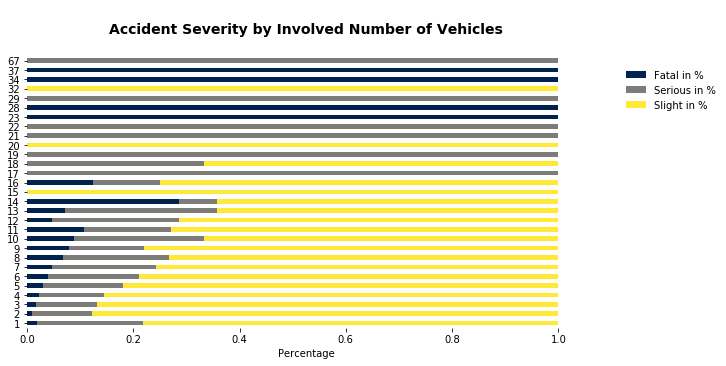

In [26]:
order = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,28,29,32,34,37,67]
fig, ax = plt.subplots(figsize=(10, 5))
counts_number_of_vehicles_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Involved Number of Vehicles\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)
sns.despine(top = True, right = True, left = True, bottom = True);

In [27]:
counts_road_type = df_accident_Severity.groupby(['Road_Type', 'Accident_Severity']).size()
counts_road_type = counts_road_type.rename_axis(['Speed_limit', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts_road_type['sum'] = counts_road_type.sum(axis=1)
counts_road_type = counts_road_type.join(counts_road_type.div(counts_road_type['sum'], axis=0), rsuffix=' in %')
counts_road_type_share = counts_road_type.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)
counts_road_type_share

Accident_Severity,Fatal in %,Serious in %,Slight in %
Speed_limit,,,
Data missing or out of range,NaN,NaN,1.000000
Dual carriageway,0.017491,0.123708,0.858800
One way street,0.006704,0.130034,0.863262
Roundabout,0.003079,0.092816,0.904105
Single carriageway,0.013146,0.148539,0.838315
Slip road,0.007700,0.092959,0.899341
Unknown,0.006946,0.106488,0.886566


In [28]:
counts_road_type_share

Accident_Severity,Fatal in %,Serious in %,Slight in %
Speed_limit,,,
Data missing or out of range,NaN,NaN,1.000000
Dual carriageway,0.017491,0.123708,0.858800
One way street,0.006704,0.130034,0.863262
Roundabout,0.003079,0.092816,0.904105
Single carriageway,0.013146,0.148539,0.838315
Slip road,0.007700,0.092959,0.899341
Unknown,0.006946,0.106488,0.886566


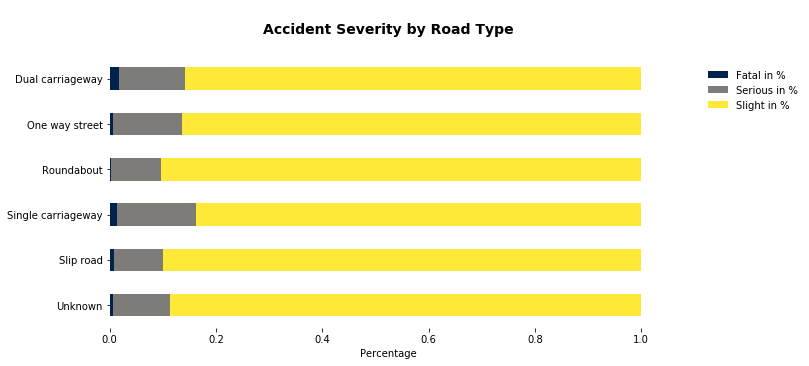

In [29]:
order = ['Unknown', 'Slip road', 'Single carriageway', 'Roundabout', 'One way street', 'Dual carriageway']
fig, ax = plt.subplots(figsize=(10, 5))
counts_road_type_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Road Type\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)
sns.despine(top = True, right = True, left = True, bottom = True);

In [30]:
counts_speed_limit = df_accident_Severity.groupby(['Speed_limit', 'Accident_Severity']).size()
counts_speed_limit = counts_speed_limit.rename_axis(['Speed_limit', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts_speed_limit['sum'] = counts_speed_limit.sum(axis=1)
counts_speed_limit = counts_speed_limit.join(counts_speed_limit.div(counts_speed_limit['sum'], axis=0), rsuffix=' in %')
counts_speed_limit_share = counts_speed_limit.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)
counts_speed_limit_share

Accident_Severity,Fatal in %,Serious in %,Slight in %
Speed_limit,,,
0.0,NaN,NaN,1.000000
10.0,0.157895,0.105263,0.736842
15.0,NaN,0.062500,0.937500
20.0,0.005208,0.146644,0.848147
30.0,0.006681,0.127678,0.865640
40.0,0.014695,0.141034,0.844271
50.0,0.022093,0.153010,0.824897
60.0,0.031540,0.193011,0.775449
70.0,0.023197,0.124110,0.852693


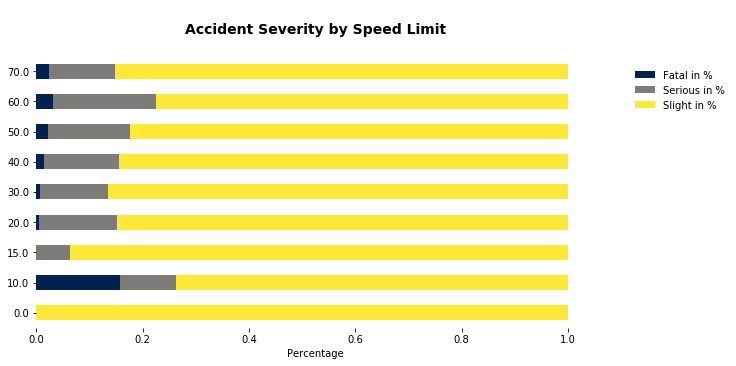

In [31]:
order = [0.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0]
fig, ax = plt.subplots(figsize=(10, 5))
counts_speed_limit_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Speed Limit\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)
sns.despine(top = True, right = True, left = True, bottom = True);

In [32]:
df_vehicle_info = vehicle_info_raw[['Accident_Index','make','model','Age_of_Vehicle','Vehicle_Type']]
df_vehicle_info[:2]

,Accident_Index,make,model,Age_of_Vehicle,Vehicle_Type
0,200401BS00001,ROVER,45 CLASSIC 16V,3.0,109
1,200401BS00002,BMW,C1,NaN,109


In [33]:
vehicle_type_distribution = vehicle_info_raw['Vehicle_Type'].value_counts().sort_values(ascending = False)

In [34]:
vehicle_type_distribution

Car                                      1528628
Van / Goods 3.5 tonnes mgw or under       117427
109                                        82920
Bus or coach (17 or more pass seats)       76757
Motorcycle over 500cc                      71472
Motorcycle 125cc and under                 61600
Goods 7.5 tonnes mgw and over              55426
Taxi/Private hire car                      43781
Pedal cycle                                38904
Motorcycle 50cc and under                  22415
Motorcycle over 125cc and up to 500cc      20960
Goods over 3.5t. and under 7.5t            18236
Other vehicle                              13994
106                                         7568
Agricultural vehicle                        6018
Minibus (8 - 16 passenger seats)            5900
Goods vehicle - unknown weight              1876
108                                         1334
Motorcycle - unknown cc                      741
Mobility scooter                             502
Data missing or out 

In [35]:
vehicle_info_raw[:5]

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,BMW,C1,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,LONDON TAXIS INT,TXII GOLD AUTO,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [36]:
make_distribution = df_vehicle_info['make'].value_counts().sort_values(ascending = False)

In [37]:
make_distribution

VAUXHALL                239650
FORD                    237084
PEUGEOT                 126533
VOLKSWAGEN              120820
RENAULT                 114300
HONDA                   103165
MERCEDES                 89891
TOYOTA                   83597
CITROEN                  81787
NISSAN                   71265
BMW                      68194
FIAT                     59739
VOLVO                    59440
AUDI                     51349
SUZUKI                   42266
ROVER                    34591
YAMAHA                   28349
SKODA                    28113
LAND ROVER               24036
HYUNDAI                  22819
MAZDA                    22803
SEAT                     21761
MITSUBISHI               21187
KIA                      18800
DENNIS                   18694
SCANIA                   18670
MINI                     16138
KAWASAKI                 15436
DAF TRUCKS               13114
PIAGGIO                  11400
                         ...  
CTM                          1
MOTOBECA

In [38]:
trace = go.Bar(x = make_distribution.index,
               text = ['{:.1f} %'.format(val) for val in (make_distribution.values / df_vehicle_info.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = make_distribution.values,
               )
layout = dict(title = 'Distribution Of {} accidents'.format(df_vehicle_info.shape[0]),
              xaxis = dict(title = 'Accident_Severity'),
              yaxis = dict(title = 'Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [39]:
min_accidents_count = 10000
filter_vehicle = df_vehicle_info['make'].value_counts() > min_accidents_count

In [40]:
filter_vehicle = filter_vehicle[filter_vehicle].index.tolist()

In [41]:
# filter_vehicle = filter_vehicle[filter_vehicle].index.tolist()
# df_vehicle_info_filtered = df_vehicle_info[df_vehicle_info['make'].isin(filter_vehicle)]

In [42]:
df_vehicle_info_filtered = df_vehicle_info[df_vehicle_info['make'].isin(filter_vehicle)]

In [43]:
df_vehicle_info_filtered.shape

(1885392, 5)

In [44]:
make_distribution_filtered = df_vehicle_info_filtered['make'].value_counts().sort_values(ascending = False)

In [45]:
make_distribution_filtered

VAUXHALL            239650
FORD                237084
PEUGEOT             126533
VOLKSWAGEN          120820
RENAULT             114300
HONDA               103165
MERCEDES             89891
TOYOTA               83597
CITROEN              81787
NISSAN               71265
BMW                  68194
FIAT                 59739
VOLVO                59440
AUDI                 51349
SUZUKI               42266
ROVER                34591
YAMAHA               28349
SKODA                28113
LAND ROVER           24036
HYUNDAI              22819
MAZDA                22803
SEAT                 21761
MITSUBISHI           21187
KIA                  18800
DENNIS               18694
SCANIA               18670
MINI                 16138
KAWASAKI             15436
DAF TRUCKS           13114
PIAGGIO              11400
LONDON TAXIS INT     10306
MAN                  10095
Name: make, dtype: int64

In [46]:
trace = go.Bar(x = make_distribution_filtered.index,
               text = ['{:.1f} %'.format(val) for val in (make_distribution_filtered.values / df_vehicle_info.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = make_distribution_filtered.values,
               )
layout = dict(title = 'Distribution Of {} accidents'.format(df_vehicle_info.shape[0]),
              xaxis = dict(title = 'Accident_Severity'),
              yaxis = dict(title = 'Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [47]:
df_severity_vehicle = pd.merge(df_accident_Severity, df_vehicle_info_filtered, how = 'inner', on = 'Accident_Index')

In [48]:
df_severity_vehicle.shape

(1779847, 10)

In [49]:
df_severity_vehicle[:2]

,Accident_Index,Accident_Severity,Road_Type,Speed_limit,Number_of_Vehicles,Time,make,model,Age_of_Vehicle,Vehicle_Type
0,200501BS00002,Slight,Dual carriageway,30.0,1,17:36,DENNIS,NaN,3.0,Bus or coach (17 or more pass seats)
1,200501BS00003,Slight,Single carriageway,30.0,2,00:15,DENNIS,NaN,5.0,Bus or coach (17 or more pass seats)


In [50]:
counts_vehicle_type_accident_severity = df_severity_vehicle.groupby(['Vehicle_Type', 'Accident_Severity']).size()

In [51]:
counts_vehicle_type_accident_severity = counts_vehicle_type_accident_severity.rename_axis(['make', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')

In [52]:
counts_vehicle_type_accident_severity.shape

(21, 3)

In [53]:
# counts_vehicle_type_accident_severity = df_severity_vehicle.groupby(['Vehicle_Type', 'Accident_Severity']).size()
# counts_vehicle_type_accident_severity = counts_vehicle_type_accident_severity.rename_axis(['make', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
# counts_vehicle_type_accident_severity.shape
# counts_vehicle_type_accident_severity['sum'] = counts_vehicle_type_accident_severity.sum(axis = 1)
# counts_vehicle_type_accident_severity = counts_vehicle_type_accident_severity.join(counts_vehicle_type_accident_severity.div(counts_vehicle_type_accident_severity['sum'], axis=0), rsuffix=' in %')
# counts_vehicle_type_accident_severity_share = counts_vehicle_type_accident_severity.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)

# sorted_type_by_fatal = counts_vehicle_type_accident_severity_share.sort_values(by=['Fatal in %'],ascending=False)
# list_sorted_fatal_type = sorted_type_by_fatal.index.tolist()
# order = list_sorted_fatal_type
# fig, ax = plt.subplots(figsize=(10, 5))
# sorted_type_by_fatal.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
# ax.set_title('\nAccident Severity by Involved Vehicle Types\n', fontsize = 14, fontweight='bold')
# ax.set(xlabel='Percentage', ylabel='')
# ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)
# sns.despine(top = True, right = True, left = True, bottom = True);

In [54]:
counts_vehicle_type_accident_severity['sum'] = counts_vehicle_type_accident_severity.sum(axis = 1)
counts_vehicle_type_accident_severity = counts_vehicle_type_accident_severity.join(counts_vehicle_type_accident_severity.div(counts_vehicle_type_accident_severity['sum'], axis=0), rsuffix=' in %')
counts_vehicle_type_accident_severity_share = counts_vehicle_type_accident_severity.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)

In [55]:
counts_vehicle_type_accident_severity_share[:2]

Accident_Severity,Fatal in %,Serious in %,Slight in %
make,,,
Agricultural vehicle,0.033546,0.177316,0.789137
Bus or coach (17 or more pass seats),0.012264,0.114734,0.873002


In [56]:
sorted_type_by_fatal = counts_vehicle_type_accident_severity_share.sort_values(by=['Fatal in %'],ascending=False)

In [57]:
sorted_type_by_fatal

Accident_Severity,Fatal in %,Serious in %,Slight in %
make,,,
Goods 7.5 tonnes mgw and over,0.055878,0.166483,0.777638
Motorcycle over 500cc,0.040381,0.328428,0.631191
Agricultural vehicle,0.033546,0.177316,0.789137
Goods over 3.5t. and under 7.5t,0.027038,0.132890,0.840072
Motorcycle - unknown cc,0.024691,0.263374,0.711934
Other vehicle,0.020177,0.122898,0.856924
Motorcycle over 125cc and up to 500cc,0.019540,0.262455,0.718005
Minibus (8 - 16 passenger seats),0.018724,0.140431,0.840845
Goods vehicle - unknown weight,0.015873,0.130952,0.853175


In [58]:
list_sorted_fatal_type = sorted_type_by_fatal.index.tolist()

In [59]:
print(list_sorted_fatal_type)

['Goods 7.5 tonnes mgw and over', 'Motorcycle over 500cc', 'Agricultural vehicle', 'Goods over 3.5t. and under 7.5t', 'Motorcycle - unknown cc', 'Other vehicle', 'Motorcycle over 125cc and up to 500cc', 'Minibus (8 - 16 passenger seats)', 'Goods vehicle - unknown weight', 'Van / Goods 3.5 tonnes mgw or under', 'Bus or coach (17 or more pass seats)', 'Car', 'Pedal cycle', 'Taxi/Private hire car', 'Motorcycle 125cc and under', 'Motorcycle 50cc and under', 'Data missing or out of range', 'Electric motorcycle', 'Mobility scooter', 'Ridden horse', 'Tram']


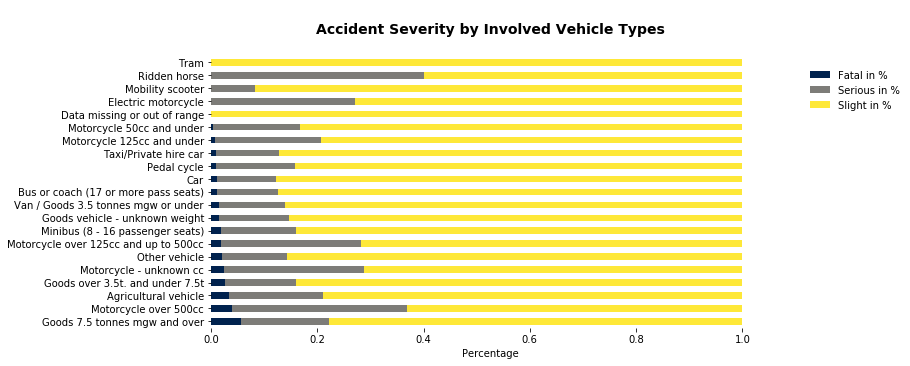

In [60]:
order = list_sorted_fatal_type
fig, ax = plt.subplots(figsize=(10, 5))
sorted_type_by_fatal.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Involved Vehicle Types\n', fontsize = 14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)
sns.despine(top = True, right = True, left = True, bottom = True);

In [61]:
counts_make_accident_severity = df_severity_vehicle.groupby(['make', 'Accident_Severity']).size()

In [62]:
counts_make_accident_severity = counts_make_accident_severity.rename_axis(['make', 'Accident_Severity']).unstack('Accident_Severity').rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')

In [63]:
counts_make_accident_severity.shape

(32, 3)

In [64]:
counts_make_accident_severity['sum'] = counts_make_accident_severity.sum(axis = 1)
counts_make_accident_severity = counts_make_accident_severity.join(counts_make_accident_severity.div(counts_make_accident_severity['sum'], axis=0), rsuffix=' in %')
counts_make_accident_severity_share = counts_make_accident_severity.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)

In [65]:
counts_make_accident_severity_share[:5]

Accident_Severity,Fatal in %,Serious in %,Slight in %
make,,,
AUDI,0.013124,0.112770,0.874106
BMW,0.013606,0.124800,0.861593
CITROEN,0.011146,0.113443,0.875411
DAF TRUCKS,0.044662,0.151020,0.804317
DENNIS,0.011933,0.114257,0.873810


In [66]:
sorted_make_by_fatal = counts_make_accident_severity_share.sort_values(by=['Fatal in %'], ascending=False)

In [67]:
sorted_make_by_fatal

Accident_Severity,Fatal in %,Serious in %,Slight in %
make,,,
DAF TRUCKS,0.044662,0.151020,0.804317
KAWASAKI,0.037637,0.318240,0.644122
MAN,0.035742,0.139370,0.824888
SCANIA,0.033883,0.142570,0.823547
SUZUKI,0.025303,0.229121,0.745576
YAMAHA,0.021722,0.266207,0.712071
VOLVO,0.021347,0.126287,0.852366
LAND ROVER,0.016836,0.138974,0.844190
MITSUBISHI,0.016394,0.126129,0.857476


In [68]:
list_sorted_make_by_fatal = sorted_make_by_fatal.index.tolist()

In [69]:
print(list_sorted_make_by_fatal)

['DAF TRUCKS', 'KAWASAKI', 'MAN', 'SCANIA', 'SUZUKI', 'YAMAHA', 'VOLVO', 'LAND ROVER', 'MITSUBISHI', 'HONDA', 'MERCEDES', 'BMW', 'AUDI', 'ROVER', 'SKODA', 'KIA', 'SEAT', 'DENNIS', 'MAZDA', 'RENAULT', 'FORD', 'CITROEN', 'PEUGEOT', 'NISSAN', 'VAUXHALL', 'VOLKSWAGEN', 'TOYOTA', 'FIAT', 'LONDON TAXIS INT', 'HYUNDAI', 'MINI', 'PIAGGIO']


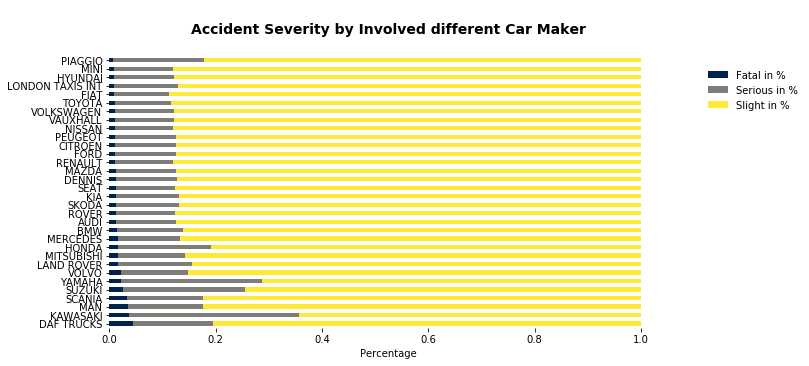

In [70]:
order = list_sorted_make_by_fatal
fig, ax = plt.subplots(figsize=(10, 5))
sorted_make_by_fatal.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Involved different Car Maker\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)
sns.despine(top = True, right = True, left = True, bottom = True);

In [71]:
counts_make_accident_severity_share.sort_index(by=['Fatal in %'],ascending=False)

Accident_Severity,Fatal in %,Serious in %,Slight in %
make,,,
DAF TRUCKS,0.044662,0.151020,0.804317
KAWASAKI,0.037637,0.318240,0.644122
MAN,0.035742,0.139370,0.824888
SCANIA,0.033883,0.142570,0.823547
SUZUKI,0.025303,0.229121,0.745576
YAMAHA,0.021722,0.266207,0.712071
VOLVO,0.021347,0.126287,0.852366
LAND ROVER,0.016836,0.138974,0.844190
MITSUBISHI,0.016394,0.126129,0.857476


In [72]:
counts_make_accident_severity_share.shape

(32, 3)

In [73]:
counts_make_accident_severity_share.sort_index(by=['Fatal in %'],ascending=False)

Accident_Severity,Fatal in %,Serious in %,Slight in %
make,,,
DAF TRUCKS,0.044662,0.151020,0.804317
KAWASAKI,0.037637,0.318240,0.644122
MAN,0.035742,0.139370,0.824888
SCANIA,0.033883,0.142570,0.823547
SUZUKI,0.025303,0.229121,0.745576
YAMAHA,0.021722,0.266207,0.712071
VOLVO,0.021347,0.126287,0.852366
LAND ROVER,0.016836,0.138974,0.844190
MITSUBISHI,0.016394,0.126129,0.857476


In [76]:
# accident_Severity = df_severity_vehicle_nodup['Accident_Severity'].value_counts().sort_index(ascending = False)

In [75]:
df_severity_vehicle

,Accident_Index,Accident_Severity,Road_Type,Speed_limit,Number_of_Vehicles,Time,make,model,Age_of_Vehicle,Vehicle_Type
0,200501BS00002,Slight,Dual carriageway,30.0,1,17:36,DENNIS,NaN,3.0,Bus or coach (17 or more pass seats)
1,200501BS00003,Slight,Single carriageway,30.0,2,00:15,DENNIS,NaN,5.0,Bus or coach (17 or more pass seats)
2,200501BS00004,Slight,Single carriageway,30.0,1,10:35,NISSAN,ALMERA SE AUTO,4.0,Car
3,200501BS00005,Slight,Single carriageway,30.0,1,21:13,HONDA,NaN,10.0,Motorcycle 125cc and under
4,200501BS00006,Slight,Single carriageway,30.0,2,12:40,AUDI,A4 SPORT CABRIOLET AUTO,1.0,Car
5,200501BS00006,Slight,Single carriageway,30.0,2,12:40,PIAGGIO,VESPA ET4,2.0,Motorcycle 125cc and under
6,200501BS00007,Slight,Single carriageway,30.0,2,20:40,AUDI,A4 T AUTO,NaN,Motorcycle 125cc and under
7,200501BS00007,Slight,Single carriageway,30.0,2,20:40,MERCEDES,ML 430 AUTO,4.0,Car
8,200501BS00012,Slight,Single carriageway,30.0,1,00:42,FORD,MONDEO GHIA X AUTO,6.0,Car
9,200501BS00014,Slight,Single carriageway,30.0,2,20:48,PIAGGIO,VESPA ET4,1.0,Motorcycle 125cc and under


In [280]:
filter_cars = df_severity_vehicle.loc[(df_severity_vehicle.Vehicle_Type == 'Car')]

In [281]:
filter_cars

,Accident_Index,Accident_Severity,Road_Type,Speed_limit,Number_of_Vehicles,Time,make,model,Age_of_Vehicle,Vehicle_Type
2,200501BS00004,Slight,Single carriageway,30.0,1,10:35,NISSAN,ALMERA SE AUTO,4.0,Car
4,200501BS00006,Slight,Single carriageway,30.0,2,12:40,AUDI,A4 SPORT CABRIOLET AUTO,1.0,Car
7,200501BS00007,Slight,Single carriageway,30.0,2,20:40,MERCEDES,ML 430 AUTO,4.0,Car
8,200501BS00012,Slight,Single carriageway,30.0,1,00:42,FORD,MONDEO GHIA X AUTO,6.0,Car
10,200501BS00016,Slight,One way street,30.0,2,05:01,MERCEDES,C220 CDI CLASSIC,4.0,Car
13,200501BS00020,Slight,Single carriageway,30.0,2,09:15,PEUGEOT,406 2.0 COUPE AUTO,7.0,Car
15,200501BS00021,Slight,Single carriageway,30.0,2,21:16,VAUXHALL,VECTRA CLUB DI,5.0,Car
16,200501BS00022,Serious,Single carriageway,30.0,1,03:00,HONDA,ACCORD VTEC SPORT,1.0,Car
19,200501BS00029,Slight,Dual carriageway,30.0,2,07:34,ROVER,75 CONTMPY SE CDTI TOUR A,1.0,Car
23,200501BS70007,Slight,Single carriageway,30.0,4,13:02,HONDA,HR-V,6.0,Car


In [282]:
cars_distribution = filter_cars['make'].value_counts().sort_values(ascending = False)

In [283]:
cars_distribution

VAUXHALL            207254
FORD                180750
PEUGEOT             106155
VOLKSWAGEN          103407
RENAULT              94528
TOYOTA               73160
CITROEN              66651
NISSAN               63219
BMW                  60705
MERCEDES             54330
HONDA                53123
FIAT                 50208
AUDI                 48959
ROVER                28627
SKODA                23149
VOLVO                22738
LAND ROVER           22576
MAZDA                21116
HYUNDAI              21039
SEAT                 20437
MITSUBISHI           18226
KIA                  17753
SUZUKI               17042
MINI                 15890
LONDON TAXIS INT       992
YAMAHA                 789
DAF TRUCKS             546
SCANIA                 536
KAWASAKI               478
MAN                    388
DENNIS                 341
PIAGGIO                330
Name: make, dtype: int64

In [284]:
min_accidents_count = 10000
filtered_cars_morethan10000 = filter_cars['make'].value_counts() > min_accidents_count

In [285]:
filtered_cars_morethan10000 = filtered_cars_morethan10000[filtered_cars_morethan10000].index.tolist()
df_vehicle_info_filtered = filter_cars[filter_cars['make'].isin(filtered_cars_morethan10000)]

In [286]:
df_vehicle_info_filtered.shape

(1391042, 10)

In [287]:
cars_distribution_after_filter = df_vehicle_info_filtered['make'].value_counts().sort_values(ascending = False)
cars_distribution_after_filter

VAUXHALL      207254
FORD          180750
PEUGEOT       106155
VOLKSWAGEN    103407
RENAULT        94528
TOYOTA         73160
CITROEN        66651
NISSAN         63219
BMW            60705
MERCEDES       54330
HONDA          53123
FIAT           50208
AUDI           48959
ROVER          28627
SKODA          23149
VOLVO          22738
LAND ROVER     22576
MAZDA          21116
HYUNDAI        21039
SEAT           20437
MITSUBISHI     18226
KIA            17753
SUZUKI         17042
MINI           15890
Name: make, dtype: int64

In [296]:
def severityPercentage(df):
    counts = df.groupby(['make', 'Accident_Severity']).size()
    counts = counts.rename_axis(['make', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
    counts['sum'] = counts.sum(axis=1)
    counts = counts.join(counts.div(counts['sum'], axis=0), rsuffix=' in %')
    counts_share = counts.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)
    counts_share_sorted = counts_share.sort_values(by=['Fatal in %'],ascending = True)
    order = counts_share_sorted.index.tolist()
    # prepare barplot
    fig, ax = plt.subplots(figsize=(10, 5))

    # plot
    counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
    ax.set_title('\nAccident Severity by make\n', fontsize=14, fontweight='bold')
    ax.set(xlabel='Percentage', ylabel='')
    ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

    # remove all spines
    sns.despine(top=True, right=True, left=True, bottom=True);

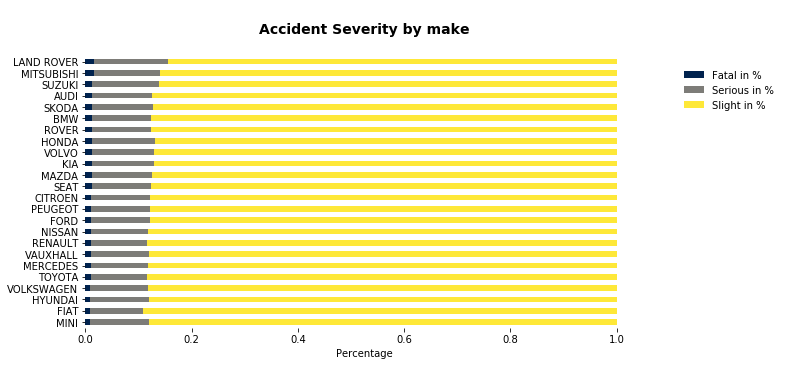

In [297]:
severityPercentage(df_vehicle_info_filtered)

In [364]:
def severityPercentageAndSpeed(df_raw, speed):
    df = df_raw.loc[(df_severity_vehicle.Speed_limit == speed)]
    counts = df.groupby(['make', 'Accident_Severity']).size()
    counts = counts.rename_axis(['make', 'Accident_Severity'])\
                                .unstack('Accident_Severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
    counts['sum'] = counts.sum(axis=1)
    counts = counts.join(counts.div(counts['sum'], axis=0), rsuffix=' in %')
    counts_share = counts.drop(columns=['Fatal', 'Serious', 'Slight', 'sum', 'sum in %'], axis=1)
    #counts_share_sorted = counts_share.sort_values(by=['Fatal in %'], ascending = False)
    #print(counts_share_sorted)
    order = counts_share.index.tolist()
    fatal_rate = counts_share['Fatal in %'].tolist()
    #print(fatal_rate)
    #print(order)
    return order, fatal_rate

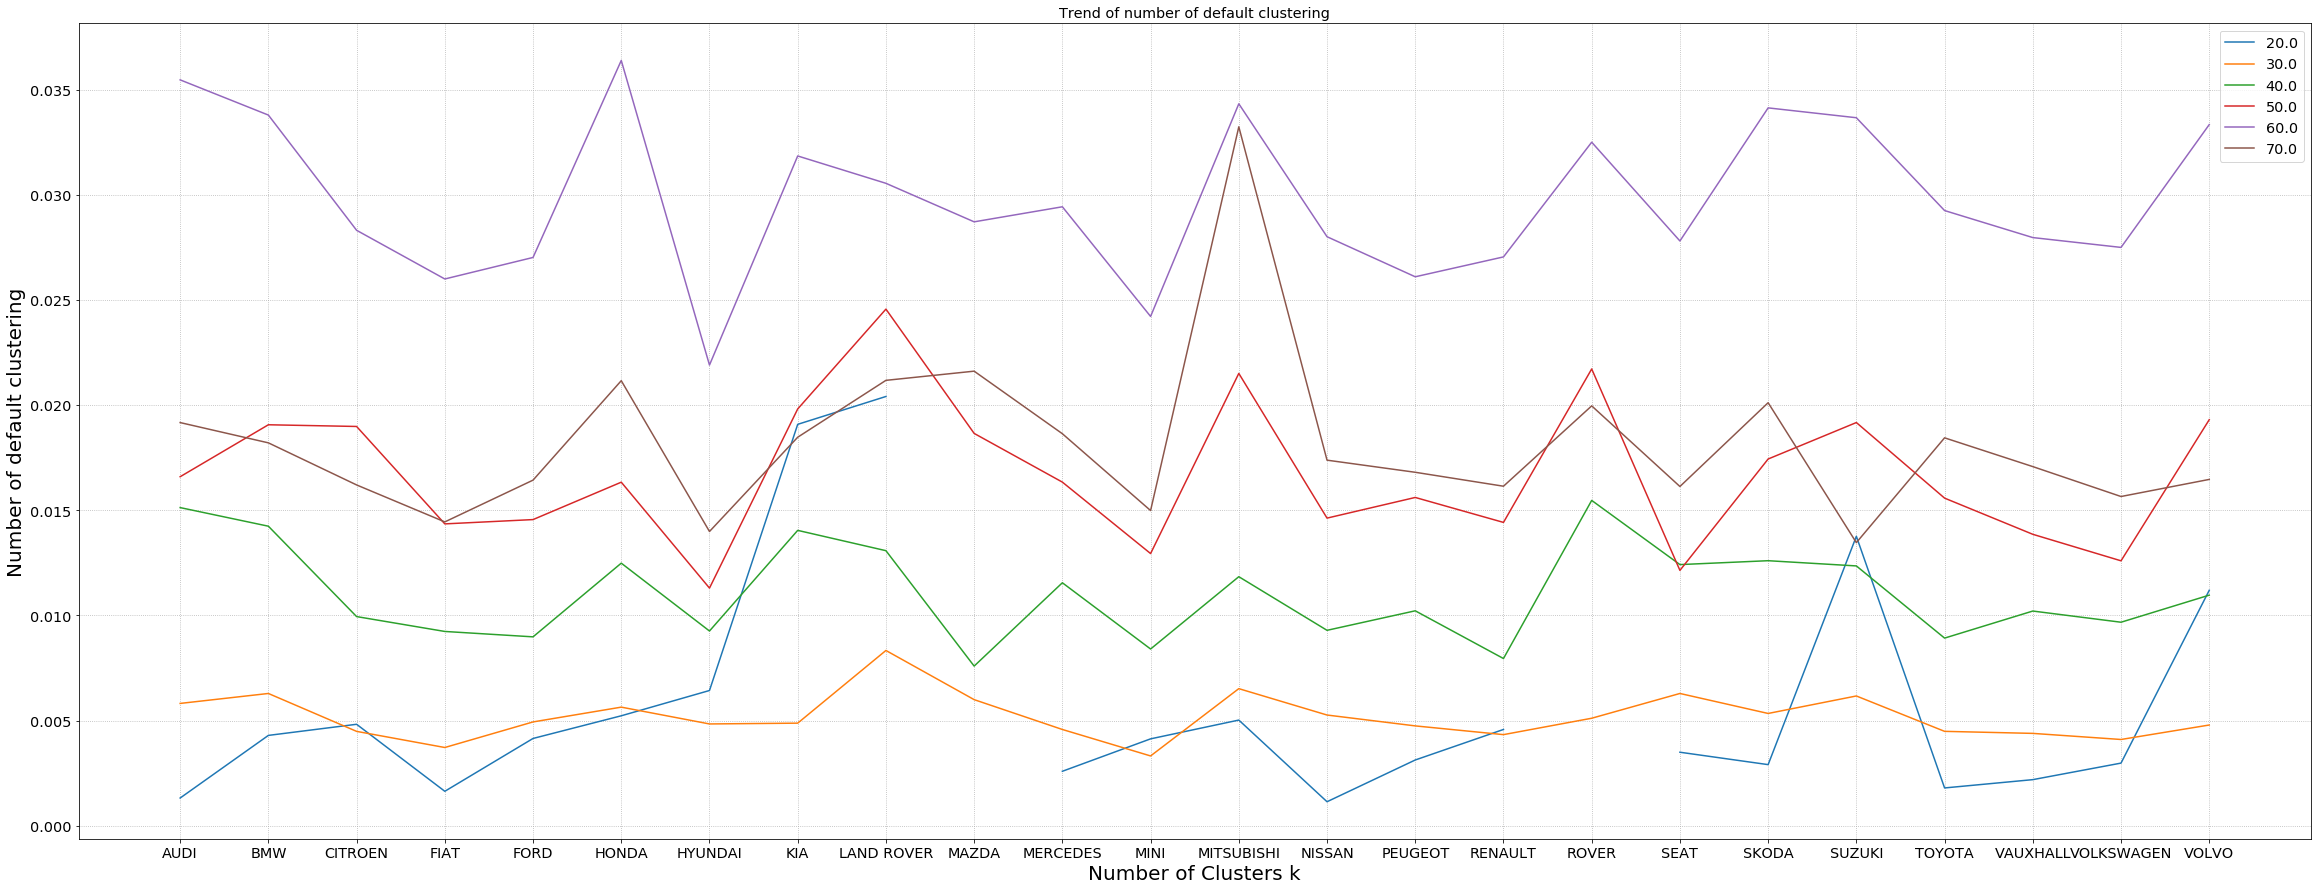

In [401]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (40, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


speed_list = [20.0, 30.0, 40.0, 50.0, 60.0, 70.0]
#speed_list= [70.0]
for index in range(0, len(speed_list)):
    order, fatal_rate = severityPercentageAndSpeed(df_vehicle_info_filtered, speed_list[index])
    plt.plot(order, fatal_rate, label = str(speed_list[index]))

plt.xlabel('Number of Clusters k',fontsize = 20)
plt.ylabel('Number of default clustering',fontsize = 20)
plt.title('Trend of number of default clustering')
plt.legend()
plt.grid(linestyle='dotted')
plt.savefig('plot_kmean.png')
plt.show()

In [128]:
accident_Severity

Slight     1747985
Serious     262221
Fatal        27054
Name: Accident_Severity, dtype: int64

In [98]:
vehicle_info.groupby('make', as_index = False).count().sort_values(['Accident_Index'], ascending = False)

,make,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
490,VAUXHALL,239650,239650,209385,239650,161913,221369,239650,239650,239650,239650,238972,221370,239650,239650,239650,239650,239564,239650,239650,239650,239650,239650,239650
152,FORD,237084,237084,203312,237084,157380,215208,237084,237084,237084,237084,234356,215292,237084,237084,237084,237084,236994,237084,237084,237084,237084,237084,237084
369,PEUGEOT,126533,126533,113884,126533,89580,119632,126533,126533,126533,126533,125176,119650,126533,126533,126533,126533,126502,126533,126533,126533,126533,126533,126533
499,VOLKSWAGEN,120820,120820,105124,120820,81731,112427,120820,120820,120820,120820,119170,112428,120820,120820,120820,120820,120767,120820,120820,120820,120820,120820,120820
390,RENAULT,114300,114300,102327,114300,78079,106268,114300,114300,114300,114300,109226,106345,114300,114300,114300,114300,114264,114300,114300,114300,114300,114300,114300
182,HONDA,103165,103165,94320,103165,73400,100324,103165,103165,103165,103165,92969,100324,103165,103165,103165,103165,103115,103165,103165,103165,103165,103165,103165
309,MERCEDES,89891,89891,74524,89891,61175,79846,89891,89891,89891,89891,72011,79884,89891,89891,89891,89891,89853,89891,89891,89891,89891,89891,89891
475,TOYOTA,83597,83597,76972,83597,58894,80875,83597,83597,83597,83597,79355,80876,83597,83597,83597,83597,83546,83597,83597,83597,83597,83597,83597
90,CITROEN,81787,81787,70348,81787,57223,73926,81787,81787,81787,81787,81458,73931,81787,81787,81787,81787,81763,81787,81787,81787,81787,81787,81787
346,NISSAN,71265,71265,62789,71265,49888,65851,71265,71265,71265,71265,69153,66021,71265,71265,71265,71265,71243,71265,71265,71265,71265,71265,71265


In [78]:
make_categories

ABARTH                179
AC (ELECTRIC)           1
ACCESS                 18
ACURA                   6
ADLY                   74
AEBI                    1
AEON                    4
AGRIFAC                 2
AIXAM                  93
AJP                     1
AJS                   541
ALEXANDER DENNIS     8584
ALFA ROMEO           5108
ALL WHEEL DRIVE        11
APPLIED SWEEPER        29
APRILIA              7232
ASIA                    8
ASTON MARTIN          315
ATALA                   2
AUDI                51349
AUSTIN                705
AUSTIN HEALEY          17
AUSTIN MORRIS          58
AUTO-TRAIL             40
AUTOSAN                 8
AVELING BARFORD         5
AVIA                    7
AXR                     2
BAJAJ                  17
BAOTIAN               560
                    ...  
WARRIOR                 1
WARTBURG                1
WESTFIELD              35
WHITE KNUCKLE         160
WINGET                  1
WK BIKES              113
WOLSELEY               10
WRIGHTBUS   

In [71]:
trace = go.Bar(x = make_categories.index,
               text = ['{:.1f} %'.format(val) for val in (make_categories.values / vehicle_info.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = make_categories.values,
               )

layout = dict(title = 'Distribution Of {} accidents'.format(vehicle_info.shape[0]),
              xaxis = dict(title = 'Accident_Severity'),
              yaxis = dict(title = 'Count'))

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [7]:
df = pd.merge(vehicle_info, accident_info, how = 'inner', on = 'Accident_Index')

In [8]:
df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
